In [ ]:
import pandas as pd
import networkx as nx
import hashlib
import numpy as np
import seaborn as sn
from sklearn import naive_bayes as nb 
import matplotlib.pyplot as plt
import pandas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# load dataset
#File name change for replay and mixedone
dataframe = pandas.read_table('/content/AttackFreeGraphImpersion_GraphFeatures.txt')
data = dataframe.drop("No.", axis=1)
data = data.drop("StdPageRank", axis=1)
data = data.drop("VarPageRank", axis=1)

X = data.values


# split into input (X) and output (Y) variables

#l = 36893 
l = len(dataframe)


labels = []
for i in range (0,l):
  if X[i][9] == True:
    labels.append(0)
  else:
    labels.append(1)




features = data.iloc[:,0:9]



print(labels.count(0))
print(labels.count(1))




# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state= 42)#

  # Initialize our classifier
nb = nb.GaussianNB()


  # Train our classifier
nb.fit(train, train_labels)
preds = nb.predict(test)
  
  # Evaluate accurac
print(accuracy_score(test_labels, preds))
print(test_labels.count(0))
print(test_labels.count(1))
cm = confusion_matrix(test_labels, preds)

print(cm.T)

21201
20584
0.933502538071066
7006
6784
[[6105   16]
 [ 901 6768]]


[ 1.49137056e-01  1.73430022e-01  5.25018129e-03  3.62581581e-04
  4.53952139e-03  1.59535896e-04  9.58955765e-02 -4.20594634e-04
  8.64829587e-02]


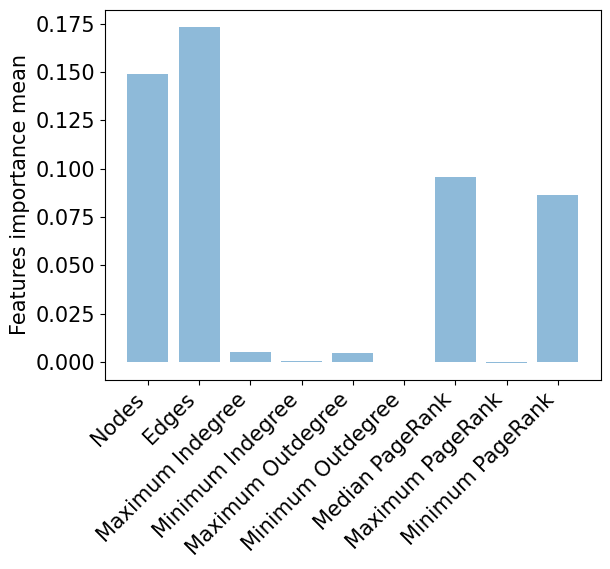

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33)

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

imps = permutation_importance(gaussian_nb, X_test, y_test)
print(imps.importances_mean)
an = ["Nodes","Edges","Maximum Indegree","Minimum Indegree","Maximum Outdegree","Minimum Outdegree", "Median PageRank",
      "Maximum PageRank","Minimum PageRank"]
plt.bar(an, np.array(imps.importances_mean), width = .8, align='center', alpha=0.5)
plt.xticks(rotation=45, ha ='right', fontsize = 15)
plt.ylabel('Features importance mean', fontsize = 15)
plt.tick_params(labelsize=15)
plt.savefig('feature_importance_replay.PNG', bbox_inches = "tight")
plt.savefig('feature_importance_replay.svg', bbox_inches = "tight")
plt.savefig('feature_importance_replay.pdf', bbox_inches = "tight")

In [ ]:
!pip install sklearn

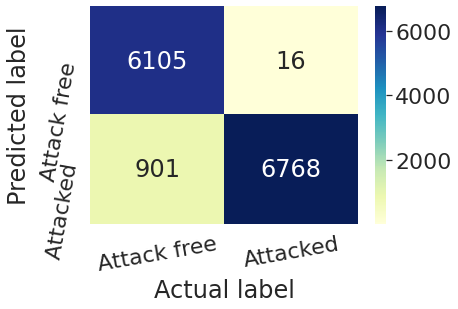

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
from pylab import savefig
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(test_labels, preds)

cm = cm.T

cm_matrix = pd.DataFrame(data=cm, columns=['Attack free', 'Attacked'], 
                                 index=['   Attack free ', ' Attacked'])
sns.set(font_scale=2)
sns.heatmap(cm_matrix, annot=True, fmt= 'd', cmap='YlGnBu')
# plt.title("Confusion Matrix for All attack")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.yticks(rotation = 80)
plt.xticks(rotation = 10)
plt.rcParams['font.size'] = 4
plt.rcParams['figure.figsize'] = (1, 1)   
plt.savefig('confusion_replay.pdf', bbox_inches = "tight")
plt.savefig('confusion_replay.PNG', bbox_inches = "tight")
plt.savefig('confusion_replay.svg', bbox_inches = "tight")
# cls = classification_report(test_labels, preds, digits = 5)
# figure2 = cls.get_figure()
# figure2.savefig('svm_conf2.pdf')

#plt.rcParams['font.size'] = 12
# # plot histogram with 10 bins
# plt.hist(preds, bins = 10)

# plt.xlabel('Predicted')
# plt.ylabel('Frequency


Text(0, 0.5, 'Frequency')

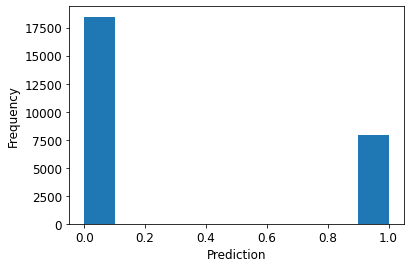

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(preds, bins = 10)

plt.xlabel('Prediction')
plt.ylabel('Frequency')


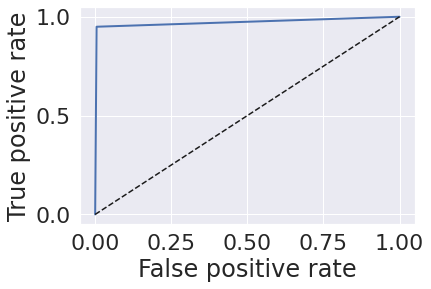

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_labels, preds)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 10



plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

plt.savefig('roc_curve.pdf', bbox_inches = "tight")
plt.savefig('roc_curve.PNG', bbox_inches = "tight")
plt.savefig('roc_curve.svg', bbox_inches = "tight")


In [ ]:
from sklearn.metrics import roc_auc_score

import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# load dataset
dataframe = pandas.read_table('/content/completeallwithNode.txt')
data = dataframe.drop("No.", axis=1)
dataset = dataframe.values

#print(data)

# split into input (X) and output (Y) variables

l = 79854
#l = 18565 + 659
X = dataset[0:l,1:]
# Y = dataset[100:200, 1:10]
# print(X)
# print(X.shape)
labels = []
for i in range (0,l):
  if X[i][9] == 'T':
    labels.append(0)
  else:
    labels.append(1)

features = X[0:l,0:9]

# df = dataframe.corr()

# #print(df)


# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

preds = gnb.predict(test)

ROC_AUC = roc_auc_score(test_labels, preds)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9724


In [ ]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, train, train_labels, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9740


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, train, train_labels, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))


print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.97720052 0.97962998 0.97943925 0.98056075 0.9811215  0.98130841
 0.98149533 0.97813084 0.97738318 0.98317757]
Average cross-validation score: 0.9799


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10, 10)
title_config = {'fontsize': 20, 'y': 1.05}

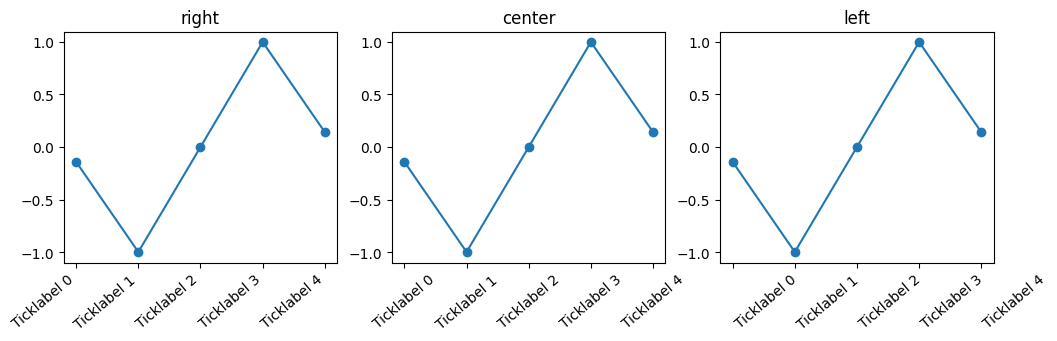

In [ ]:
n=5

x = np.arange(n)
y = np.sin(np.linspace(-3,3,n))
xlabels = ['Ticklabel %i' % i for i in range(n)]

fig, axs = plt.subplots(1,3, figsize=(12,3))

ha = ['right', 'center', 'left']

for n, ax in enumerate(axs):
    ax.plot(x,y, 'o-')
    ax.set_title(ha[n])
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, rotation=40, ha=ha[n])